In [16]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [2]:
df=pd.read_csv(r"C:\Users\Ashu Kapil\Documents\NORTHEASTERN\Spring 19\Data Science Engineering Methods\Assignments\Assignment 2\\Computers.csv",decimal = ',')


In [3]:
df.head()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [4]:
cd1={"yes":1,"no":0}

In [5]:
df.cd=[cd1[item] for item in df.cd]
df.head()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,0,no,yes,94,1
1,2,1795,33,85,2,14,0,no,yes,94,1
2,3,1595,25,170,4,15,0,no,yes,94,1
3,4,1849,25,170,8,14,0,no,no,94,1
4,5,3295,33,340,16,14,0,no,yes,94,1


In [6]:
multi1={"yes":1,"no":0}
df.multi=[multi1[item] for item in df.multi]
df.head()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,0,0,yes,94,1
1,2,1795,33,85,2,14,0,0,yes,94,1
2,3,1595,25,170,4,15,0,0,yes,94,1
3,4,1849,25,170,8,14,0,0,no,94,1
4,5,3295,33,340,16,14,0,0,yes,94,1


In [7]:
premium1={"yes":1,"no":0}
df.premium=[premium1[item] for item in df.premium]
df.head()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,0,0,1,94,1
1,2,1795,33,85,2,14,0,0,1,94,1
2,3,1595,25,170,4,15,0,0,1,94,1
3,4,1849,25,170,8,14,0,0,0,94,1
4,5,3295,33,340,16,14,0,0,1,94,1


In [8]:
df.describe()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


In [9]:
df.isnull().values.any()

False

In [10]:
df.drop('S.No.', axis=1, inplace=True)

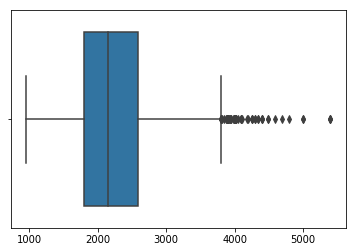

In [11]:
sns.boxplot(np.array(df['price']))

In [12]:
df.corr()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.197343,-0.016651,-0.080696,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,0.258260,0.084172,0.114208,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,0.503570,0.092805,0.196924,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,0.438504,0.045497,0.197145,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,0.129488,-0.001740,0.018745,-0.093919,0.188614
cd,0.197343,0.258260,0.503570,0.438504,0.129488,1.000000,0.432179,0.216077,-0.061091,0.445780
multi,-0.016651,0.084172,0.092805,0.045497,-0.001740,0.432179,1.000000,0.124775,-0.030394,0.210907
premium,-0.080696,0.114208,0.196924,0.197145,0.018745,0.216077,0.124775,1.000000,-0.152023,0.042107
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,-0.061091,-0.030394,-0.152023,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,0.445780,0.210907,0.042107,-0.318553,1.000000


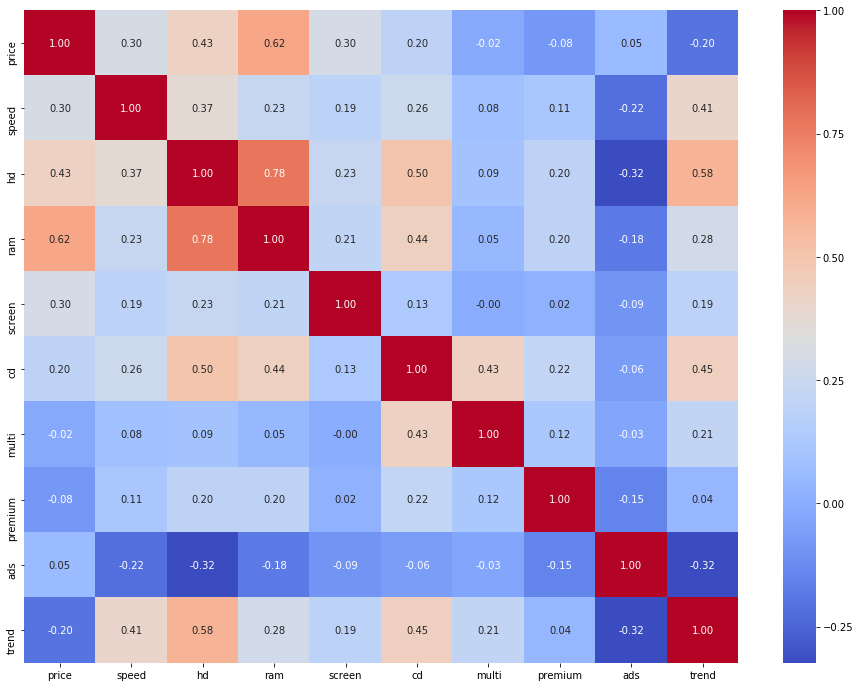

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

From the heatmap, we can understand that the major factors affecting the price of computers are speed, hd, ram, screen and cd. Now we can plot the heatmap just by taking these attributes

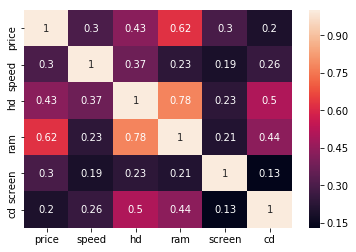

In [14]:
x=df[['price','speed','hd','ram','screen','cd']]
sns.heatmap(x.corr(), annot=True)

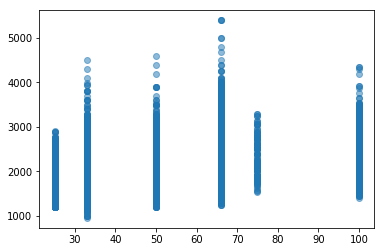

In [19]:
x=df['speed']
y=df['price']

plt.scatter(x, y,  alpha=0.5)
plt.show()